# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [4]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [5]:
data = raw_data.copy()
data = data.drop(['name'], axis = 1)
data.iloc[:,0:3].head()

,Longitude,Latitude,continent
0,-69.982677,12.520880,North America
1,66.004734,33.835231,Asia
2,17.537368,-12.293361,Africa
3,-63.064989,18.223959,North America
4,20.049834,41.142450,Europe


In [6]:
data['continent'] = data['continent'].map({'North America':0, 
                                                 'Asia': 1,
                                                 'Africa':2,
                                                 'Europe':3,
                                                 'South America':4,
                                                 'Oceania':5,
                                                 'Antarctica':6,
                                                 'Seven seas (open ocean)': 7})

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

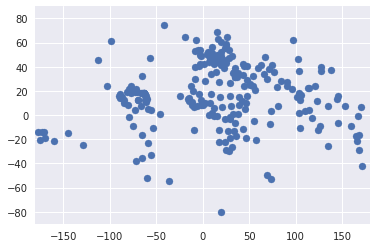

In [17]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [21]:
def fit_and_wcss(num_clusters, input_data):
    print("num_clusters: {0}".format(num_clusters))
    data = input_data.copy()
    x = data.iloc[:,0:3]
    
    kmeans = KMeans(num_clusters)
    kmeans.fit(x)
    identified_clusters = kmeans.fit_predict(x)

    data['Cluster'] = identified_clusters

    plt.scatter(data['Longitude'],data['Latitude'],c=data['Cluster'],cmap='rainbow')
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.show()
    
    return kmeans.inertia_

## Clustering

Use 4 clusters initially.

num_clusters: 1


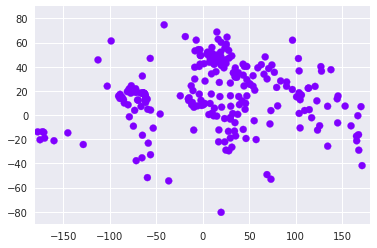

num_clusters: 2


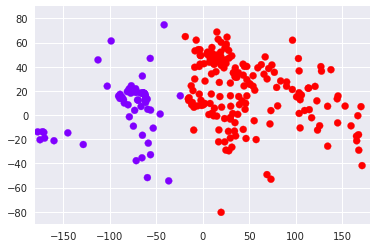

num_clusters: 3


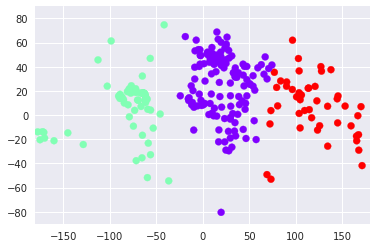

num_clusters: 4


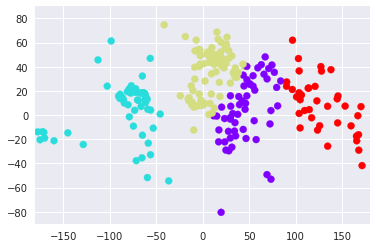

num_clusters: 5


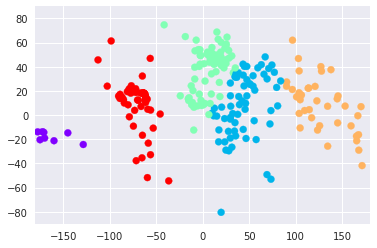

num_clusters: 6


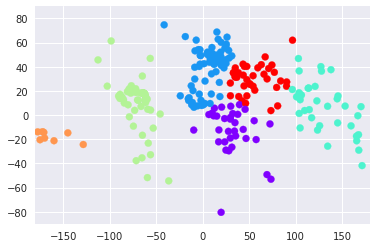

num_clusters: 7


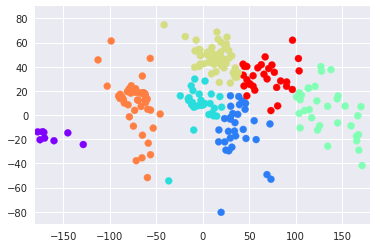

num_clusters: 8


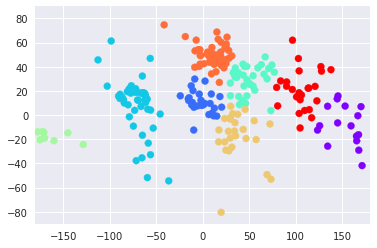

num_clusters: 9


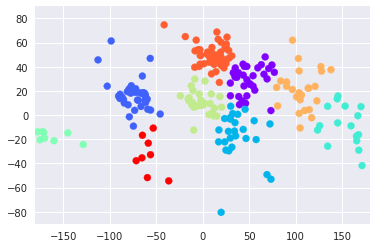

In [22]:
wcss = [fit_and_wcss(n, data) for n in range(1, 10)]

### Clustering results

In [14]:
wcss

[1414582.2109547593,
 657709.2003208959,
 325921.88351033407,
 257260.11945284143,
 192810.26105025253,
 151987.36365917476,
 127330.12683633225,
 103293.72666436638,
 85277.90535332545]

Text(0,0.5,'Within-cluster Sum of Squares')

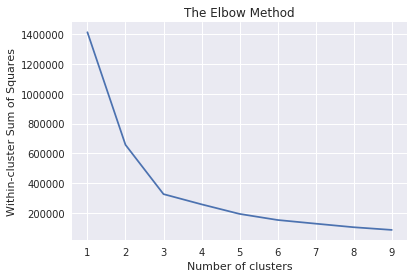

In [16]:
number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

### The Elbow Method

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>